# Basic operations on images

## Load Images
- cv2.IMREAD_COLOR: Color image
- cv2.IMREAD_GRAYSCALE: Gray scale image

#### 👀 The openCV read format is BGR

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("./01_Picture/01_cat.jpg")

In [2]:
img

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

## Show Images

In [3]:
# Use Windows to display images
cv2.imshow('image', img)
# A value of 0 indicates the window is closed by pressing any key, 
# and any other value indicates the window duration
cv2.waitKey(0) 
cv2.destroyAllWindows()

#### Write the function that displays the images

In [4]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
img.shape
# The three values in the output represent height, width, and BGR

(414, 500, 3)

# Gray Scale Image

In [6]:
# Read image as Gray Scale Image
img = cv2.imread("./01_Picture/01_cat.jpg", cv2.IMREAD_GRAYSCALE)
img

array([[153, 157, 162, ..., 174, 173, 172],
       [119, 124, 129, ..., 173, 172, 171],
       [120, 124, 130, ..., 172, 171, 170],
       ...,
       [187, 182, 167, ..., 202, 191, 170],
       [165, 172, 164, ..., 185, 141, 122],
       [179, 179, 146, ..., 197, 142, 141]], dtype=uint8)

In [7]:
img.shape
# The output is just height and width

(414, 500)

In [8]:
# Use cv_show fuction to display the image
cv_show("image",img)

In [9]:
# Save Image
cv2.imwrite('GrayCat.png',img)

True

In [10]:
type(img)

numpy.ndarray

In [11]:
img.size # The number of pixels

207000

In [12]:
img.dtype

dtype('uint8')

# Load Videos
- cv2.VideoCapture can capture the camera and control different devices with numbers such as 0,1.
- If the video file, you can directly make a good path.

In [13]:
vc = cv2.VideoCapture('./02_Video/00_Scenery.mp4')

In [14]:
# if open correctly
if vc.isOpened():
    open,frame = vc.read()
else:
    open = False

In [15]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Video', gray)
        if cv2.waitKey(10) & 0xFF == 27:
            break

vc.release()
cv2.destroyAllWindows()

# Intercept Part of the Image Data —— ROI (Region Of Interest)

In [16]:
img = cv2.imread("./01_Picture/01_cat.jpg")
cat = img[200:400,0:200]
cv_show('cat', cat)

# Color Channel Extraction

In [17]:
b,g,r = cv2.split(img)

In [18]:
b

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       ...,
       [162, 157, 142, ..., 181, 170, 149],
       [140, 147, 139, ..., 169, 125, 106],
       [154, 154, 121, ..., 183, 128, 127]], dtype=uint8)

In [19]:
b.shape

(414, 500)

In [20]:
img = cv2.merge((b,g,r))
img.shape

(414, 500, 3)

In [21]:
# only keep R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R', cur_img)

In [22]:
# only keep G
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G', cur_img)

In [23]:
# only keep B
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B', cur_img)

# Border Extension
- BORDER_REPLICATE: Extends by replicating the border pixels.
- BORDER_REFLECT: Extends by reflecting the border pixels.
- BORDER_REFLECT_101: Extends by reflecting_101_ (reverse mirrored reflection) at the borders.
- BORDER_WRAP: Extends by using horizontal and vertical flips, creating a wrap-around effect.
- BORDER_CONSTANT: Extends by adding a constant value at the borders.

In [24]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)

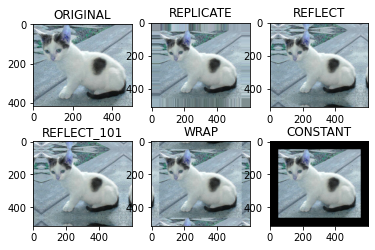

In [25]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

# Value Calculation

In [26]:
img_cat = cv2.imread("./01_Picture/01_cat.jpg")
img_dog = cv2.imread("./01_Picture/03_dog.jpg")

In [27]:
img_cat2 = img_cat + 10
img_cat[:5,:,0]

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       [139, 141, 148, ..., 156, 155, 154],
       [153, 156, 163, ..., 160, 159, 158]], dtype=uint8)

In [28]:
img_cat2[:5,:,0]

array([[152, 156, 161, ..., 166, 165, 164],
       [118, 122, 128, ..., 165, 164, 163],
       [118, 120, 128, ..., 166, 165, 164],
       [149, 151, 158, ..., 166, 165, 164],
       [163, 166, 173, ..., 170, 169, 168]], dtype=uint8)

In [29]:
(img_cat + img_cat2)[:5,:,0]
# if (img_cat + img_cat2) > 256, it will overflow, the result would be [(img_cat + img_cat2) % 256]

array([[ 38,  46,  56, ...,  66,  64,  62],
       [226, 234, 246, ...,  64,  62,  60],
       [226, 230, 246, ...,  66,  64,  62],
       [ 32,  36,  50, ...,  66,  64,  62],
       [ 60,  66,  80, ...,  74,  72,  70]], dtype=uint8)

In [30]:
cv2.add(img_cat, img_cat2)[:5,:,0]
# if the reuslt > 255, then it will be w55

array([[255, 255, 255, ..., 255, 255, 255],
       [226, 234, 246, ..., 255, 255, 255],
       [226, 230, 246, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# Image Fusion

In [31]:
img_cat.shape

(414, 500, 3)

In [32]:
img_dog = cv2.resize(img_dog, (500,414))
img_dog.shape

(414, 500, 3)

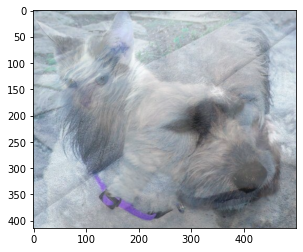

In [33]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)

plt.imshow(res)

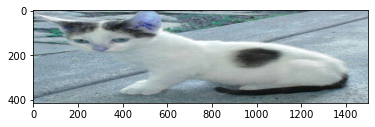

In [34]:
res = cv2.resize(img, (0, 0), fx = 3, fy = 1)
plt.imshow(res)